In [56]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List


# COCO

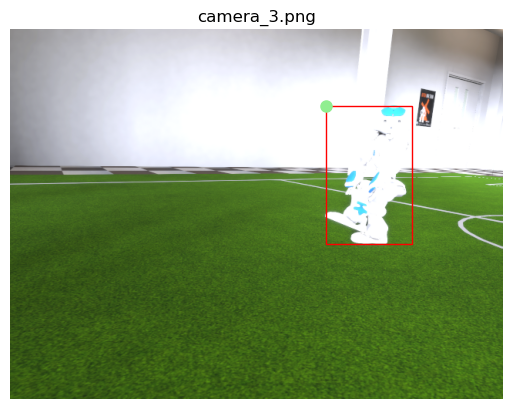

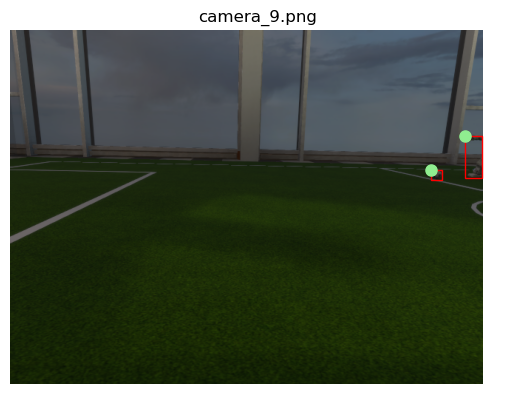

In [57]:
def visualize_bounding_boxes_coco(json_file_path: str, image_dir_path: str, image_ids: List[int]) -> None:
    """
    Visualize bounding boxes on images in COCO format.

    Args:
        json_file_path (str): Path to the COCO JSON file.
        image_dir_path (str): Path to the directory containing the images.
        image_ids (List[int]): List of image IDs to visualize.

    Returns:
        None
    """
    # Load COCO JSON file
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

    # Iterate over images in the COCO dataset
    for image_info in data['images']:
        image_id = image_info['id']
        if image_id not in image_ids:
            continue

        # Get image file name and path
        image_file_name = image_info['file_name']
        image_path = os.path.join(image_dir_path, image_file_name)

        # Open and display the image
        image = Image.open(image_path)
        plt.imshow(image)

        # Iterate over annotations to find bounding boxes for the image
        for annotation in data['annotations']:
            if annotation['image_id'] == image_id:
                bbox = annotation['bbox']
                tl_x, tl_y, w, h = bbox

                # Create a rectangle patch for the bounding box
                rectangle = patches.Rectangle((tl_x, tl_y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                plt.gca().add_patch(rectangle)

                # Add top left dot as a visual reference
                plt.plot(tl_x, tl_y, 'o', markersize=8, color='lightgreen')

        plt.title(image_file_name)
        plt.axis('off')
        plt.show()

# Example usage:
json_file_path = 'data/coco_nao/bbox.json'
image_dir_path = 'data/coco_nao/images'
image_ids = [3, 9]  # List of image IDs to visualize

visualize_bounding_boxes_coco(json_file_path, image_dir_path, image_ids)


# YOLO

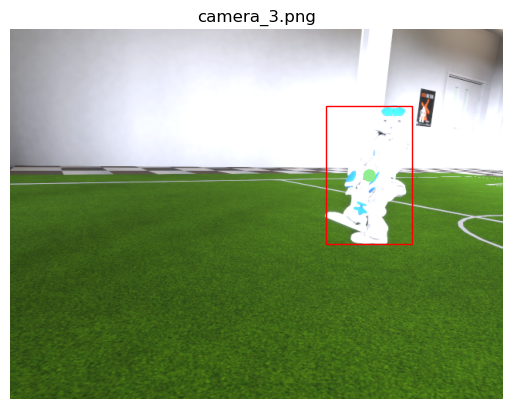

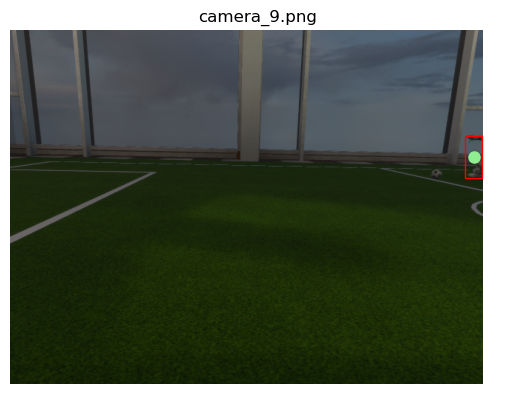

In [59]:
def visualize_bounding_boxes_yolo(image_ids: List[int], image_dir_path: str, yolo_txt_dir: str) -> None:
    """
    Visualize bounding boxes in YOLO format.

    Args:
        image_ids (List[int]): List of image IDs to visualize.
        image_dir_path (str): Path to the directory containing the images.
        yolo_txt_dir (str): Path to the directory containing the YOLO text files.

    Returns:
        None
    """
    # Iterate over the image IDs
    for image_id in image_ids:
        image_file_name = f"camera_{image_id}.png"
        image_path = os.path.join(image_dir_path, image_file_name)
        yolo_txt_file = f"camera_{image_id}.txt"
        yolo_txt_path = os.path.join(yolo_txt_dir, yolo_txt_file)

        # Open and display the image
        image = Image.open(image_path)
        plt.imshow(image)

        # Read the YOLO text file
        with open(yolo_txt_path, 'r') as txt_file:
            lines = txt_file.readlines()

        # Iterate over bounding box annotations in the YOLO text file
        for line in lines:
            bbox = line.split()
            bbox = [float(value) for value in bbox]  # Convert bbox values to float
            _, x_center, y_center, width, height = bbox

            # Calculate the coordinates of the bounding box
            x = (x_center - width / 2) * image.width
            y = (y_center - height / 2) * image.height
            w = width * image.width
            h = height * image.height

            # Create a rectangle patch for the bounding box
            rectangle = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rectangle)

            # Add the center dot as a visual reference
            plt.plot(x_center * image.width, y_center * image.height, 'o', markersize=8, color='lightgreen')

        plt.title(image_file_name)
        plt.axis('off')
        plt.show()

# Example usage:
image_ids = [3, 9]  # List of image IDs to visualize
image_dir_path = 'data/coco_nao/filtered_images'
yolo_txt_dir = 'data/coco_nao/labels'

visualize_bounding_boxes_yolo(image_ids, image_dir_path, yolo_txt_dir)
